In [1]:
#Employee Attrition Analysis and Prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix)

In [16]:
df = pd.read_csv(r'D:\Guvi notes\Employee_Attrition\Employee-Attrition.csv')

In [18]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [20]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [23]:
df.shape

(1470, 35)

In [24]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

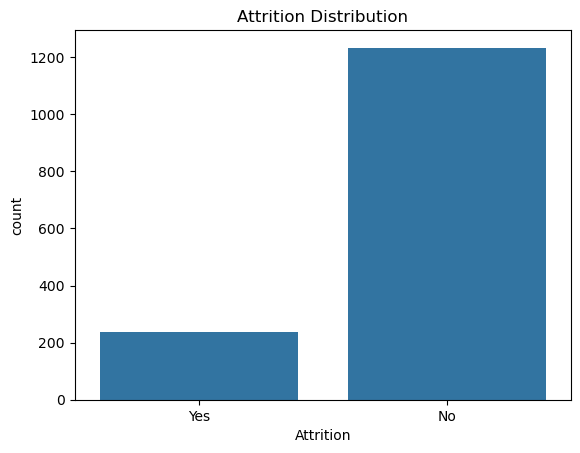

In [25]:
#Target Variable Analysis (Attrition)
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

In [26]:
#Data Preprocessing (Label Encoding)
df_processed = df.copy()

label_encoders = {}

for col in df_processed.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

df_processed.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


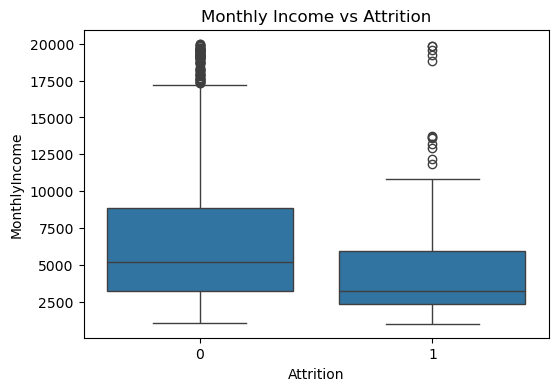

In [27]:
#Monthly Income vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_processed)
plt.title("Monthly Income vs Attrition")
plt.show()

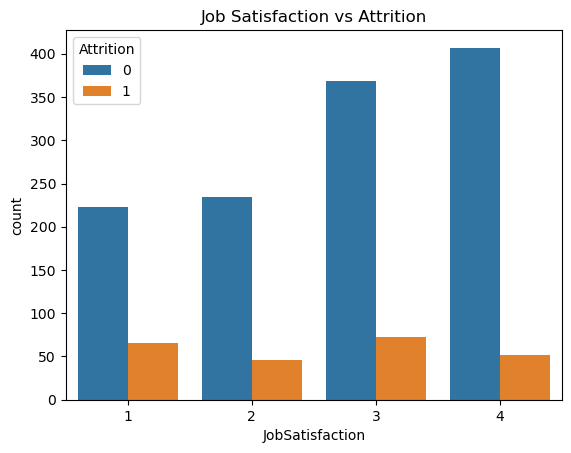

In [28]:
#Job Satisfaction vs Attrition
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df_processed)
plt.title("Job Satisfaction vs Attrition")
plt.show()

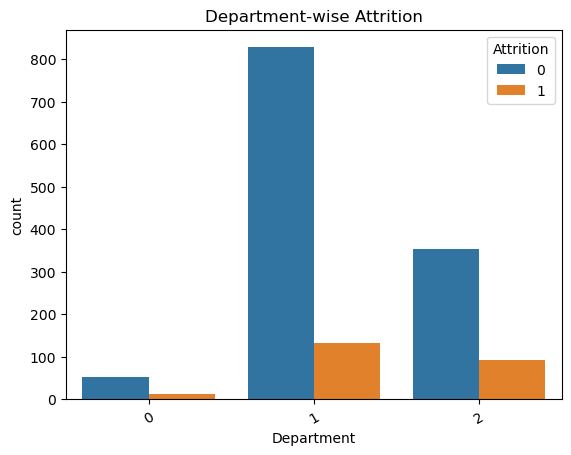

In [29]:
#Department-wise Attrition
sns.countplot(x='Department', hue='Attrition', data=df_processed)
plt.title("Department-wise Attrition")
plt.xticks(rotation=30)
plt.show()

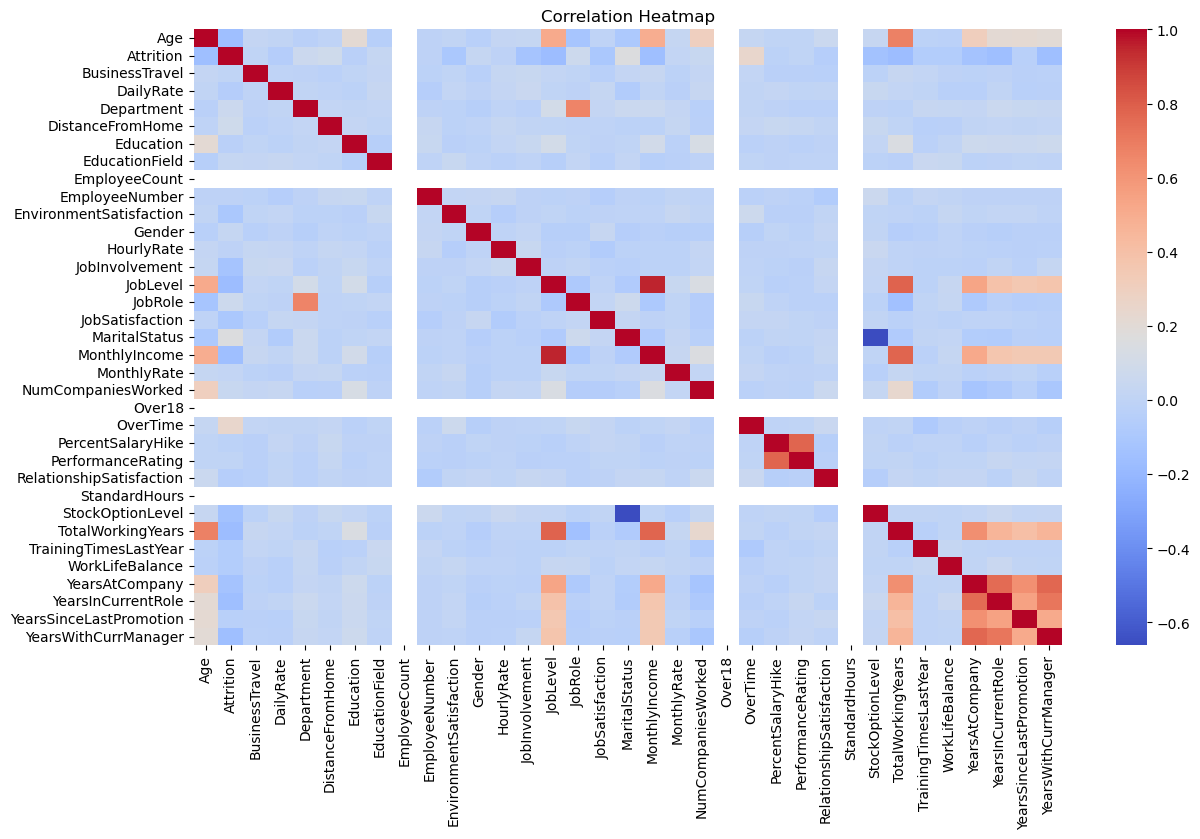

In [30]:
#Correlation Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df_processed.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [64]:
#Feature Selection & Train-Test Split
X = df_processed.drop("Attrition", axis=1)
y = df_processed["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Size:", X_train.shape)
print("Testing Size:", X_test.shape)

Training Size: (1176, 35)
Testing Size: (294, 35)


In [32]:
#Feature Selection & Train-Test Split
X = df_processed.drop("Attrition", axis=1)
y = df_processed["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

print("Training Size:", X_train.shape)
print("Testing Size:", X_test.shape)

Training Size: (735, 34)
Testing Size: (735, 34)


In [67]:
# Model Training (Random Forest)
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

print("Model Training Completed")

Model Training Completed


In [68]:
#Model Evaluation
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc)

Accuracy: 0.8741496598639455
Precision: 0.5833333333333334
Recall: 0.1794871794871795
F1 Score: 0.27450980392156865
AUC-ROC: 0.7240321769733534


In [69]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.58      0.18      0.27        39

    accuracy                           0.87       294
   macro avg       0.73      0.58      0.60       294
weighted avg       0.85      0.87      0.84       294



In [70]:
confusion_matrix(y_test, y_pred)

array([[250,   5],
       [ 32,   7]], dtype=int64)

In [37]:
#Feature Importance (Key Attrition Drivers)
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)

,Feature,Importance
17,MonthlyIncome,0.069178
0,Age,0.053586
2,DailyRate,0.053200
4,DistanceFromHome,0.050256
21,OverTime,0.049044
18,MonthlyRate,0.048580
8,EmployeeNumber,0.048059
27,TotalWorkingYears,0.046655
19,NumCompaniesWorked,0.042514
11,HourlyRate,0.042188


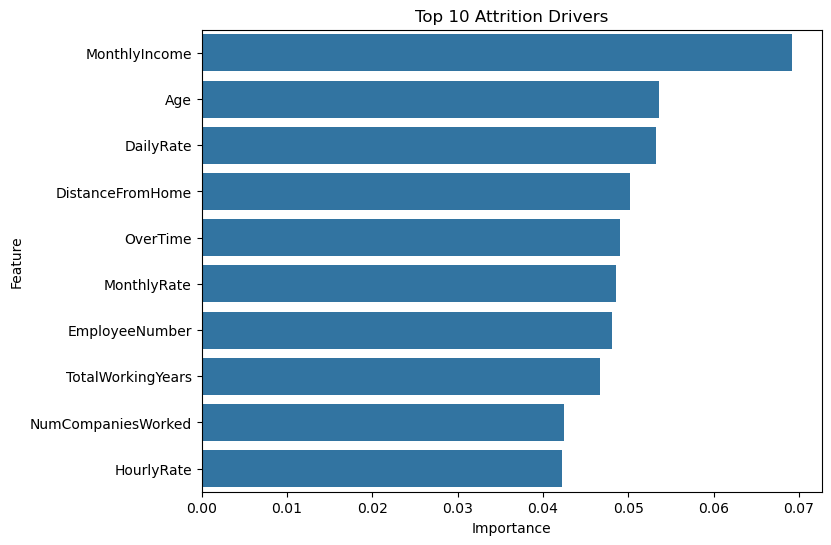

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance.head(10))
plt.title("Top 10 Attrition Drivers")
plt.show()

In [40]:
#Identify At-Risk Employees
df_processed['Attrition_Probability'] = rf_model.predict_proba(X)[:,1]
at_risk_employees = df_processed.sort_values(
    by='Attrition_Probability', ascending=False
)
at_risk_employees.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Probability
1012,31,1,1,667,2,1,4,1,1,1427,...,80,0,1,3,3,1,0,0,0,0.940
1153,18,1,1,544,2,3,2,3,1,1624,...,80,0,0,2,4,0,0,0,0,0.915
688,19,1,2,419,2,21,3,4,1,959,...,80,0,1,3,4,1,0,0,0,0.905
911,25,1,1,599,2,24,1,1,1,1273,...,80,0,1,4,3,1,0,1,0,0.900
1332,29,1,1,459,1,24,2,1,1,1868,...,80,0,1,3,2,1,0,1,0,0.895
463,26,1,2,471,1,24,3,5,1,622,...,80,0,1,3,1,1,0,0,0,0.895
1060,24,1,1,381,1,9,3,3,1,1494,...,80,0,4,2,2,0,0,0,0,0.895
1339,22,1,2,391,1,7,1,1,1,1878,...,80,0,1,2,3,1,0,0,0,0.890
1365,29,1,1,746,2,24,3,5,1,1928,...,80,0,1,3,3,1,0,0,0,0.880
1379,27,1,1,1337,0,22,3,0,1,1944,...,80,0,1,2,3,1,0,0,0,0.880


In [ ]:
#Business Insight Summary
#1. Employees with low job satisfaction show higher attrition.
#2. Lower monthly income correlates strongly with attrition.
#3. Overtime significantly increases attrition probability.
#4. Employees with fewer years at company are more likely to leave.
#5. The Random Forest model achieved high predictive performance.

In [71]:
#Import RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [97]:
# RFE (Recursive Feature Elimination)
# Apply RFE (Feature Selection)
lr = LogisticRegression(max_iter=1000, solver='liblinear')

# Select top N features (try 10–15)
rfe = RFE(estimator=lr, n_features_to_select=35)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_Probability'],
      dtype='object')


In [99]:
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

In [74]:
#Retrain Random Forest on Selected Features
rf_rfe = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

rf_rfe.fit(X_train_rfe, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300,
                       random_state=42)

In [75]:
#Re-evaluate Model (After RFE)
y_pred_rfe = rf_rfe.predict(X_test_rfe)
y_prob_rfe = rf_rfe.predict_proba(X_test_rfe)[:, 1]

accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
precision_rfe = precision_score(y_test, y_pred_rfe)
recall_rfe = recall_score(y_test, y_pred_rfe)
f1_rfe = f1_score(y_test, y_pred_rfe)
auc_rfe = roc_auc_score(y_test, y_prob_rfe)

print("After RFE Feature Selection")
print("Accuracy:", accuracy_rfe)
print("Precision:", precision_rfe)
print("Recall:", recall_rfe)
print("F1 Score:", f1_rfe)
print("AUC-ROC:", auc_rfe)

After RFE Feature Selection
Accuracy: 0.8741496598639455
Precision: 0.5714285714285714
Recall: 0.20512820512820512
F1 Score: 0.3018867924528302
AUC-ROC: 0.7392659627953746


In [76]:
comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"],
    "Before RFE": [accuracy, precision, recall, f1, auc],
    "After RFE": [accuracy_rfe, precision_rfe, recall_rfe, f1_rfe, auc_rfe]
})

comparison

,Metric,Before RFE,After RFE
0,Accuracy,0.874150,0.874150
1,Precision,0.583333,0.571429
2,Recall,0.179487,0.205128
3,F1 Score,0.274510,0.301887
4,AUC,0.724032,0.739266


In [129]:
#Score Improvement Use Stratified Split , Handle Class Imbalance , Tune Threshold (Boost Recall / F1)
from sklearn.model_selection import StratifiedKFold
rf_rfe = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
rf_rfe.fit(X_train, y_train)
y_pred = rf_rfe.predict(X_test)
y_prob = rf_rfe.predict_proba(X_test)[:, 1]
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("AUC      :", roc_auc_score(y_test, y_prob))

Accuracy : 0.9251700680272109
Precision: 0.8378378378378378
Recall   : 0.6595744680851063
F1 Score : 0.7380952380952381
AUC      : 0.9138599362563528


In [130]:
# SMOTE for Class Imbalance
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
from imblearn.over_sampling import SMOTENC

cat_features = [i for i, col in enumerate(X.columns)
                if col in categorical_columns]

smote = SMOTENC(
    categorical_features=cat_features,
    random_state=42,
)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [131]:
print("Before SMOTENC:")
print(y_train.value_counts())

print("\nAfter SMOTENC:")
print(y_train_sm.value_counts())

Before SMOTENC:
Attrition
0    986
1    190
Name: count, dtype: int64

After SMOTENC:
Attrition
0    986
1    986
Name: count, dtype: int64


In [142]:
#Gradient Boosting (Very Good for Attrition)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1:", f1_score(y_test, y_pred_gb))
print("AUC:", roc_auc_score(y_test, y_prob_gb))

Accuracy: 0.9251700680272109
Precision: 0.8378378378378378
Recall: 0.6595744680851063
F1: 0.7380952380952381
AUC: 0.9256611249892326


In [143]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1]),
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

In [140]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1:", f1_score(y_test, y_pred_xgb))
print("AUC:", roc_auc_score(y_test, y_prob_xgb))

Accuracy: 0.935374149659864
Recall: 0.7659574468085106
F1: 0.7912087912087912
AUC: 0.9242828839693341


In [141]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       247
           1       0.82      0.77      0.79        47

    accuracy                           0.94       294
   macro avg       0.89      0.87      0.88       294
weighted avg       0.93      0.94      0.93       294

